# MultiCollinearityInLinear Regression 多重共线性

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/Salary.csv")

In [3]:
df

,Sex,Age,YearsExperience,Salary
0,0,24,1.1,39343
1,1,25,1.3,46205
2,0,24,1.5,37731
3,1,25,2.0,43525
4,0,26,2.2,39891
5,1,26,2.9,56642
6,0,27,3.0,60150
7,1,27,3.2,54445
8,1,28,3.2,64445
9,1,28,3.7,57189


In [4]:
df.corr()

,Sex,Age,YearsExperience,Salary
Sex,1.000000,-0.016211,-0.016899,-0.030323
Age,-0.016211,1.000000,0.991219,0.977240
YearsExperience,-0.016899,0.991219,1.000000,0.982427
Salary,-0.030323,0.977240,0.982427,1.000000


In [22]:
X = X1 = df.iloc[:,:-1]
Y = df.iloc[:,-1]

## 使用corr() 分析变量之间的相关性

In [23]:
X.corr()

,Sex,Age,YearsExperience
Sex,1.000000,-0.016211,-0.016899
Age,-0.016211,1.000000,0.991219
YearsExperience,-0.016899,0.991219,1.000000


## 使用pairplot

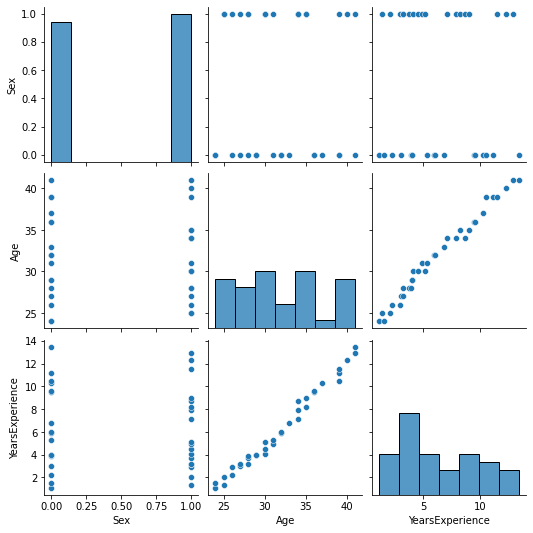

In [24]:
sns.pairplot(X)

## 使用VIF(必须使用)  VIF 方差扩大因子

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #方差扩大因子  
# 判断参数的共线性 VIF>10表示多重共线性很高
def vif(x):
    
    vif = pd.DataFrame()    
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(X.shape[1])]
    
    return(vif)

In [26]:
vif(X)

,variables,VIF
0,Sex,2.057999
1,Age,10.260063
2,YearsExperience,8.320611


##  VIF 开始于1，没有上限
##  VIF大于5或者10，说明共线性很高，要将高共线性的属性去除

In [27]:
X = X.drop("Age",axis=1) #去除高共线性的属性Age，重新计算共线性值

In [28]:
vif(X)

,variables,VIF
0,Sex,1.619485
1,YearsExperience,1.619485


# 最小二乘法 使用 statsmodels.regression.linear_model.OLS 
# Ordinary Least Squares 

In [34]:
import statsmodels.api as sm

In [35]:
X1

,Sex,Age,YearsExperience
0,0,24,1.1
1,1,25,1.3
2,0,24,1.5
3,1,25,2.0
4,0,26,2.2
5,1,26,2.9
6,0,27,3.0
7,1,27,3.2
8,1,28,3.2
9,1,28,3.7


In [40]:
X2 = sm.add_constant(X1) #添加一个常数列

In [41]:
X2

,const,Sex,Age,YearsExperience
0,1.0,0,24,1.1
1,1.0,1,25,1.3
2,1.0,0,24,1.5
3,1.0,1,25,2.0
4,1.0,0,26,2.2
5,1.0,1,26,2.9
6,1.0,0,27,3.0
7,1.0,1,27,3.2
8,1.0,1,28,3.2
9,1.0,1,28,3.7


In [42]:
model = sm.OLS(Y,X2).fit()

In [43]:
model .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     293.9
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           7.63e-23
Time:                        21:04:35   Log-Likelihood:                -353.21
No. Observations:                  35   AIC:                             714.4
Df Residuals:                      31   BIC:                             720.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             763.7343   3.63e+04      0.021      0.983   -7.34e+04    7.49e+04
Sex              -877.2893   2099.859     -0.418      0.679   -5159.981    3405.402
Age              1240.4265   1575.206      0.787      0.437   -1972.228    4453.081
YearsExperience  6993.1203   2225.038      3.143      0.004    2455.125    1.15e+04
==============================================================================
Omnibus:                        1.442   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                1.178
Skew:                           0.245   Prob(JB):                        0.555
Kurtosis:                       2.247   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
from sklearn.datasets import load_boston

In [45]:
boston = load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [46]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [47]:
type(boston)   #bunch

sklearn.utils.Bunch

In [60]:
X = pd.DataFrame(boston['data'])
X.columns = boston['feature_names']

In [61]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [62]:
X.corr()  # 相关性

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<AxesSubplot:>

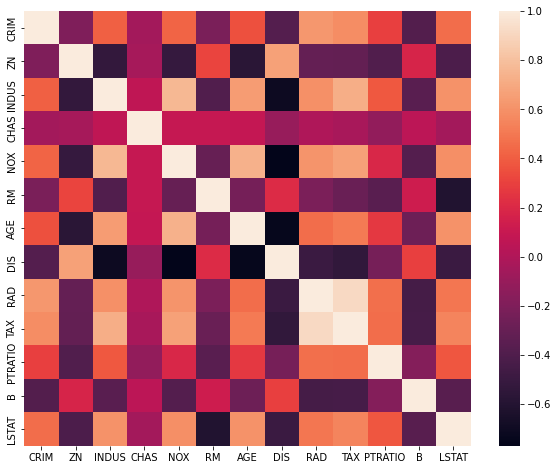

In [63]:
plt.figure(figsize = (10,8))
sns.heatmap(X.corr())   #使用热力图显示相关性

In [64]:
vif(X)

,variables,VIF
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


In [65]:
X = X.drop("PTRATIO",axis=1)

In [66]:
vif(X)

,variables,VIF
0,CRIM,2.099345
1,ZN,2.451624
2,INDUS,14.275283
3,CHAS,1.142167
4,NOX,73.894171
5,RM,60.598846
6,AGE,21.361234
7,DIS,12.221605
8,RAD,15.159162
9,TAX,59.301541


In [69]:
X = X.drop("NOX",axis=1)

KeyError: "['NOX'] not found in axis"

In [70]:
vif(X)

,variables,VIF
0,CRIM,2.097537
1,ZN,2.449661
2,INDUS,13.150904
3,CHAS,1.138277
4,RM,41.406746
5,AGE,19.889623
6,DIS,12.032952
7,RAD,15.155012
8,TAX,57.720347
9,B,18.396072


In [71]:
X = X.drop("TAX",axis=1)

In [72]:
vif(X)

,variables,VIF
0,CRIM,2.097466
1,ZN,2.375219
2,INDUS,9.290080
3,CHAS,1.118613
4,RM,39.069063
5,AGE,19.780944
6,DIS,11.817803
7,RAD,4.965633
8,B,18.289917
9,LSTAT,9.046248


In [73]:
X = X.drop("RM",axis=1)
vif(X)

,variables,VIF
0,CRIM,2.095367
1,ZN,2.334763
2,INDUS,9.016142
3,CHAS,1.116229
4,AGE,14.000758
5,DIS,8.447694
6,RAD,4.771767
7,B,13.537020
8,LSTAT,8.358925


In [74]:
X = X.drop("AGE",axis=1)
vif(X)

,variables,VIF
0,CRIM,2.095211
1,ZN,2.313889
2,INDUS,8.205465
3,CHAS,1.106350
4,DIS,8.209371
5,RAD,4.689836
6,B,10.074224
7,LSTAT,6.856889


In [75]:
X = X.drop("B",axis=1)
vif(X)

,variables,VIF
0,CRIM,2.067135
1,ZN,2.299351
2,INDUS,6.900077
3,CHAS,1.086574
4,DIS,3.968908
5,RAD,4.678181
6,LSTAT,6.726973


In [76]:
X = X.drop("INDUS",axis=1)
vif(X)

,variables,VIF
0,CRIM,2.040522
1,ZN,2.237534
2,CHAS,1.059249
3,DIS,3.941629
4,RAD,3.738091
5,LSTAT,4.248513
